### Exploratory Data Analysis

Next, we perform some exploratory data and analysis (EDA) on our data set. This will be the terminal phase of this Case Study. In general, EDA is performed for the purposes of making inferences over a data set. In a project with a goal of developing a predictive model over the data set, EDA is useful for helping to determine which family of predictive models is most appropriate. 

#### Import the Python Numerical Stack

To begin, you import the Python Numerical Stack. Note that this was done in a previous notebook, but it must be done for each notebook.

In [1]:
###### Import the Python Numerical Stack

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

##### Load Saved Data Set

In `01-load-and-verify-data.ipynb`, you retrieved the data set with which you are working from a remote URL and performed the basic preprocessing step of making sure that all columns are stored as the correct data type. After this, you saved the processed `DataFrame` to a local Pickle file called `seeds.p`. Here, you load the saved `DataFrame` for use in this notebook.

In [2]:
###### Load data from pickle file

seeds_df = pd.read_pickle('seeds.p')

#### Visualization with a Pair Plot

Because of its simplicty, the first step in EDA is often to prepare a Pair Plot of the data set. This

##### Visualization: Prepare a Pair Plot

A simple yet powerful technique for beginning EDA is the Seaborn function `pairplot()`. Seaborn<sup>sb</sup> is a Python statistical data visualization library build on top of the popular visualization library `matplotlib`. Essentially, it gives us a simple API for rendering many common statistical plots. `pairplot` takes a `DataFrame` as argument and returns a `PairGrid` plot of the pairwise relationships between each of the variables in the passed `DataFrame`.

Note that the central diagonal axis is treated differently than others. It shows the univariate distribution plot of each feature. 

Note that it the plots above the central diagnoal axis are symmetric to the plot below the central diagonal axis and it is only necessary to examine one set of plots. 

sup: https://seaborn.pydata.org


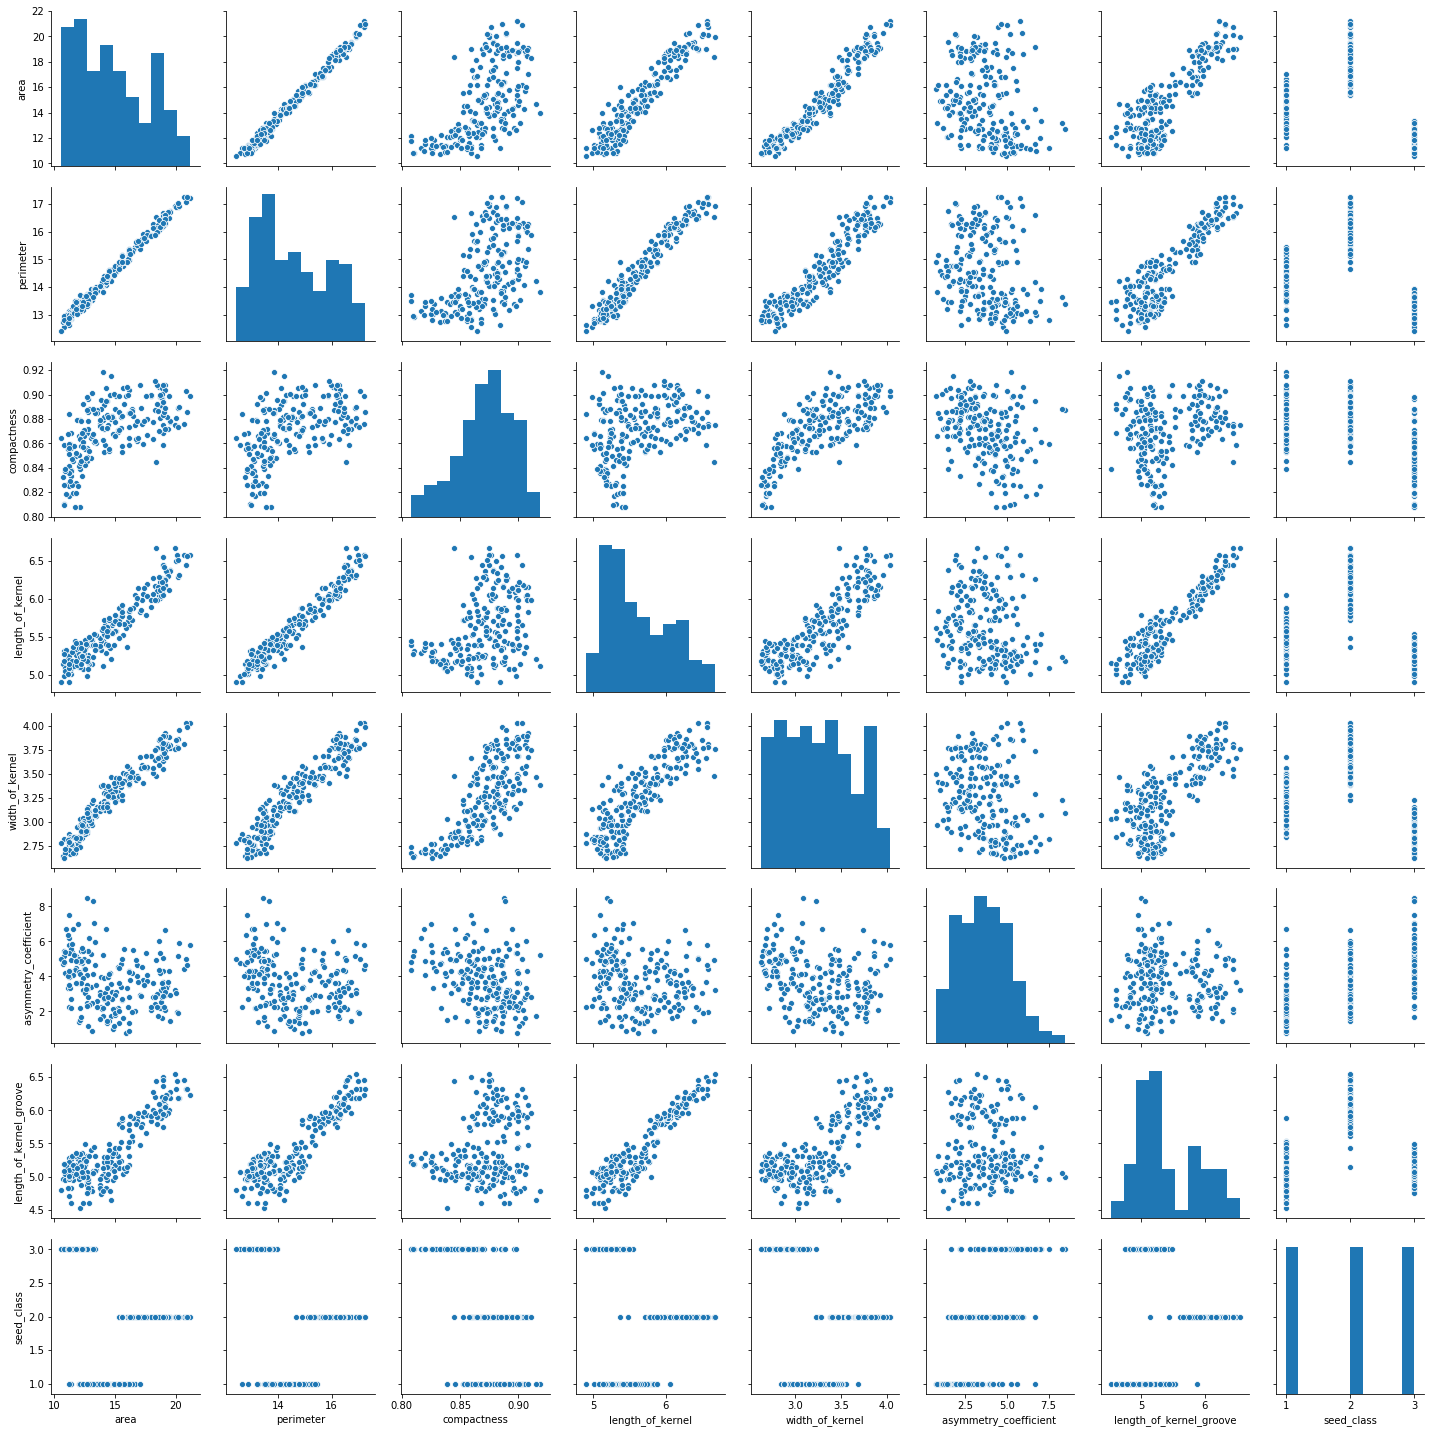

In [3]:
###### Pair plot of Seeds Dataset

sns.pairplot(seeds_df);

##### Discussion: Interpretation of the `PairGrid` Visualization

We make note of a few things in the `PairGrid`.

There are several highly linear relationships in this dataset, for example, `area-perimeter`, as shown here:

<include type="image" url="area-perimeter-corr.png">

###### Relationship between Area and Perimeter
    
![](../../img/area-perimeter-corr.png) 

</include>

Note that there are other strongly linear relationships that are not as linear as `area-perimeter`, but are still strongly linear, e.g. `length_of_kernel-width_of_kernel`, as shown here:   

![](areaperimetercorr.png) 

<include type="image" url="weaker-corr.png">

###### Relationship between Length and Width of Kernel
    
![](../../img/weaker-corr.png) 

</include>

While, there does not appear to be a clear linear separation between the classes there is some indication that we will be able to separate the classes by feature variables. Here, we can see that `area` may be a feature we can use to separate the classes:

<include type="image" url="class-separation.png">

###### Class Separation
    
![](../../img/class-separation.png) 

</include>

Discuss that these linearities can help us to choose a model.

#### Modeling for Inference 

As you continue the exploration of this data set, you will use a machine learning model for the purposes of EDA, in this case a simple single variable classification model using Logistic Regression. In *Introduction to Statistical Learning with R*, James et al. propose that an inferential investigation of a data set may be interested in the following:

- Which predictors are associated with the response?
- What is the relationship between the response and each predictor?
- Can the relationship between $Y$ and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?

Here, you use single-variable logistic regression to assess the performance of each feature individually as a predictor of `seed_class`. This is a simple technique for making inferences about the strength of associations between each feature and the target class. 

You will use Scikit-Learn for a simple implementation of the complex mathematical model, Logistic Regression. Logistic Regression is a regression model that creates the best linear separator of classes in a model. In other words, the model you build will find the line or lines that best separates each target class from the others. 

##### Create `features` and `target` Subsets of Data Set

First, you create two subsets of the complete data set:

1. `features`, a `DataFrame` that includes everything but the target column
2. `target`, a `Series` or Pandas Column, that is just the target column

In [4]:
###### Drop target feature for analysis

features = seeds_df.drop('seed_class', axis=1)
target = seeds_df.seed_class

##### Programming Method: Classes and Objects

For those who are not familiar with object-oriented programming (OOP), this next step may be a bit of a challenge. Using the OOP paradigm, classes of objects are defined in code. To use a class, we must instantiate it as an object. To make this a bit more concrete, you might think of the class, Toyota Prius. This class is a kind of car, the definition of which exists in blueprints stored by the Toyota Corporation. The Prius that you drive, however, is not the class, but an object of the class Toyota Prius. It conforms to the definition as defined in the blueprints, but it is a specific instance of that class that you are driving around. 

You do the same thing here with `lr_model` and `LogisticRegression()`. `LogisticRegression` is a class defined in the `sklearn.linear_model` library. `lr_model` is an object of class `LogisticRegression` that we will use to do our work. 

##### Import the `LogisticRegression` Class and instantiate a `LogisticRegression` Model

We import the `LogisticRegression` class from the `sklearn.linear_model` library and instantiate the `lr_model` object.

In [5]:
###### Import the `LogisticRegression` Class and instantiate a `LogisticRegression` Model

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

##### Programming Method: `for`-loop Over Features

Using a `for`-loop you iterate through each feature and use it to fit a Logistic Regression model on the data. You then score each of these models using Accuracy (the default scoring method for Scikit-Learn's classification models). Finally, each result is appended to a list called `lm_scores`. After running this cell, `lm_scores` will be a list of dictionaries containing the results of each test.

##### Programming Method: Fit and Score

With `lr_model` you are fitting and scoring a model for each step in the `for`-loop. This is a common technique with Scikit-Learn predictive models. You perform the `model.fit()` function on the data. This will execute the particular learning algorithm for your chosen model and store the fit model. You can then use the `model.score()` to score a particular fit model. 

For a Supervised Learning model, both fitting and scoring take both features and target as an argument e.g. `model.fit(X, y)` and `model.score(X, y)`. Here, `X` is the features and `y` is the target. Note that any combination of features and target can be used. Care must be taken to make sure that the indices of `X` and `y` match up e.g. that the values of the $ith$ row of `X` match the target in the $ith$ row of `y`. Additionally, it is required that `X` and `y` have the same number of rows.

During scoring, the interim step of generating predictions is performed. In order to assess the model performance, a vector of `yhat` values is generated internall and compared to the actual values, i.e. the ground truth, stored in the `y` vector.

In [6]:
###### Fit and score individual features

lm_scores = []
for feat in features.columns:
    features_subset = features[[feat]]
    lr_model.fit(features_subset, target)
    lm_scores.append({
        'feature' : feat,
        'score' : lr_model.score(features_subset, target)
    })

##### Programming Method: Manually Build a `DataFrame`

A list of dictionaries is a useful structure for storing information, but it is not an ideal way for displaying information. This can be seen by displaying `lm_scores`.

In [7]:
###### Display list of dictionaries, `lm_scores`

lm_scores

[{'feature': 'area', 'score': 0.80476190476190479},
 {'feature': 'perimeter', 'score': 0.71904761904761905},
 {'feature': 'compactness', 'score': 0.50952380952380949},
 {'feature': 'length_of_kernel', 'score': 0.66666666666666663},
 {'feature': 'width_of_kernel', 'score': 0.72857142857142854},
 {'feature': 'asymmetry_coefficient ', 'score': 0.5714285714285714},
 {'feature': 'length_of_kernel_groove', 'score': 0.60476190476190472}]

Even this simple set of results becomes unwieldy. 

Fortunately, it is trivial to convert a list of dictionaries with the same keys to a pandas `DataFrame`. We know that all of the dictionaries in `lm_scores` have the same keys, but we can confirm this with a simple Python list comprehension. 

In [8]:
###### Show keys in each dictionary in `lm_scores`

[d.keys() for d in lm_scores]

[dict_keys(['feature', 'score']),
 dict_keys(['feature', 'score']),
 dict_keys(['feature', 'score']),
 dict_keys(['feature', 'score']),
 dict_keys(['feature', 'score']),
 dict_keys(['feature', 'score']),
 dict_keys(['feature', 'score'])]

Provided that each dictionary has the same keys, each key will become the name of a column in the created `DataFrame` with the values of each dictionary forming a row.

In [9]:
###### Define and display `Dataframe lm_scores_df`

lm_scores_df = pd.DataFrame(lm_scores)
lm_scores_df

,feature,score
0,area,0.804762
1,perimeter,0.719048
2,compactness,0.509524
3,length_of_kernel,0.666667
4,width_of_kernel,0.728571
5,asymmetry_coefficient,0.571429
6,length_of_kernel_groove,0.604762


To make interpretation even easier, you perfom two transformations on the `DataFrame`. First, you assign the `feature` column to the `Index`, or row names, of the `DataFrame` using the `lm_scores_df.set_index()` function. The `inplace=True` argument specifies that this changes is to be written to the `DataFrame` stored in memory. Second, you sort the `score` column in descending order using the `lm_scores_df.sort_values(ascending=Fale)` function. Again, the `inplace=True` argument specifies that this changes is to be written to the `DataFrame` stored in memory. 

In [10]:
###### Make `feature` the Index of `lm_scores_df`

lm_scores_df.set_index('feature', inplace=True)

In [11]:
###### Sort `lm_scores_df` by Score

lm_scores_df.sort_values('score', ascending=False, inplace=True)

##### Discussion: Interpreting Coefficients of Single Variable Logistic Regression

From these results, you can see that `area` is the strongest predictor as a single variable, followed by `width_of_kernel`. It is worth noting that these scores are using the features as a single variable predictor. The order of feature strength may be significantly different if using a multi-variable model. 

#### T-SNE Model for Visualization of High-Dimensional Data

Given a data set with $p=7$, you can imagine that it will be difficult to visualize this data sets using conventional means. Humans are accustomed to looking at data in only two dimensions. We are able to visualize in three dimensions, but three-dimensional visualization is already significantly more difficult then two dimensional. And beyond that, we are out of luck. Luckily for you, there is a fairly simple, at least in implementation, method for visualizing high-dimensional data using a model called T-SNE (often pronounced "tease knee"). The math behind this technique\footnote{http://colah.github.io/posts/2014-10-Visualizing-MNIST/} can be fairly involved, but for your purposes it suffices to understand that you are creating a two-dimensional representation of our seven-dimensional features. 

You will be building a T-SNE model over your data set simply for helping to prepare a simple visualization of our data. In other words, you are again building a machine learning model solely to help with the EDA process.

The implementation of takes only a few lines of code using the Python library, Scikit-Learn\footnote{http://scikit-learn.org/stable/}.

##### Import the `TSNE` Class

Import the model that you need from Scikit-Learn. The `TSNE` model is in the `sklearn.manifold` library. 

In [12]:
###### Import the `TSNE` Class

from sklearn.manifold import TSNE

##### Instantiate a `TSNE` Model

Next, you create a `TSNE()` object named `two_dim_model`. Here, you instantiate a `TSNE` object with 2 components.

In [13]:
###### Instantiate a `TSNE` Model

two_dim_model = TSNE(n_components=2)

Note, that if you request the type of the `two_dim_model` object it tells you that it is a `TSNE` object from the `sklearn.manifold` library.

In [14]:
###### Display the `type` of `two_dim_model`

type(two_dim_model)

sklearn.manifold.t_sne.TSNE

##### Fit the Model and Transform the Data

Next, you use the `two_dim_model` object to transform your data. The transformation that you are performing is to project the original data from seven dimensions to two dimensions. Note that in this case you are not interested in overwriting the original data with this transformation. For this reason, you save the transformed data as a new variable, `features_2d`. 

##### Programming Method: Fit and Transform

With `two_dim_model` you performed the "fit" and the "transformation" in one step using the method `.fit_transform()`. In this, `two_dim_model` learned the nature of the data, that is, it was "fit" to the data. Then we used the fit model to "transform" the data, resulting in the two-dimensional `np.array`, `featured_2d`.

In [15]:
###### Fit and transform `features`

features_2d = two_dim_model.fit_transform(features)

If you display the shape of each of the objects, indeed we can see that `features` has $p=7$, while `features_2d` has $p=2$.

In [16]:
###### Display shape of Features and shape of transformed Features

features.shape, features_2d.shape

((210, 7), (210, 2))

Scikit-Learn Transformation objects always return `np.array` objects. It is best to continue to work with a Pandas `DataFrame`. For this reason, you turn `features_2d` into a `DataFrame`. You give the columns of the new `DataFrame` the names `Component_1` and `Component_2`. This new `DataFrame` will be used in the next step to prepare a two-dimensional scatter plot by class.

In [17]:
###### Convert transformed features into `DataFrame`

features_2d = pd.DataFrame(features_2d)
features_2d.columns = ['Component_1', 'Component_2']

#### Visualization: Scatter Plot by Class

The file `visualization.py` includes a helper function `scatter_plot_by_class`. As the name suggests, this function returns a scatter plot of our data with each point labeled by it's class using color.

##### Programming Method: Import Functions From File

You have previously imported functions and classes from various libraries available to you using your local Python installation. Here, for the first time, you import a function from a project file, `visualization.py`. This can be done by simply creating a file with the `.py` suffix in the current working directory. In this way, the Python interpreter will be able to easily locate the file and is able to import any functions or classes from that file as if they were part of the installed and configured Python libraries. 

##### Import `scatter_plot_by_class`

In [18]:
###### Import `scatter_plot_by_class`

from visualization import scatter_plot_by_class

##### Programming Method: A Simple Method for Controlling Plots

For most of the plots you will be generating, you will begin the cell with the line

```
fig, ax = plt.subplots(NROWS, NCOLS, figsize=(XDIM,YDIM))
```

This gives a simple and easily repeatable pattern for controlling the appearance of rendered plots within a notebook. Most often, we are interested in controlling two aspects of our plots: 1) the dimension of the plot as rendered and 2) how many and the arrange of subplots to include. Here, you use this pattern in its most trivial sense creating a "set of subplots" with one row and one column. This is a bit of overkill for this simple usage. The benefit is in using a single uniform and easily remembered pattern for working with plots and subplots. 

When using this pattern, you will most often work with the `ax` object returned by the function. The `ax` object contains references to the individual subplots in a figure. In the case where a figure is created with 1 row and 1 column of plots i.e. a single plot, the `ax` object is simply a reference to that plot. 

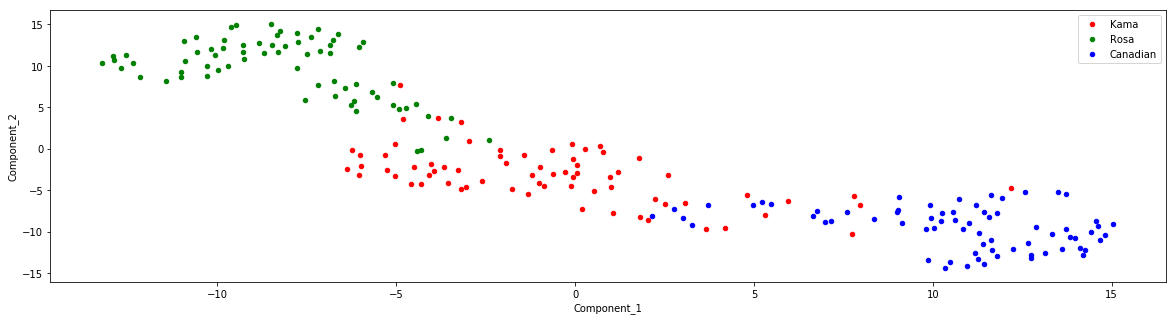

In [19]:
###### Prepare scatter plot by class

fig, ax = plt.subplots(1,1,figsize=(20,5))
scatter_plot_by_class(ax, features_2d, target)

##### Discussion: Two-Dimensional Scatter Plot by Class

Note: TSNE is a randomized-process and your results may vary slightly from the results shown below.

The two-dimensional representation of the data suggests that you may be able to easily classify this data. You can see clear linear separations in the groupings of each of the three seed types. These linear separations indicate that a linear model, such as Logistic Regression, may perform well as a classification model on this data set. 

<include type="image" url="scatter-plot-separation.png">

###### Scatter plot and class separation
    
![](../../img/scatter-plot-separation.png) 

</include>

You can also note clear shapes in the data and that class relationships appear to have some locality. This indicates that an instance-based model like K-nearest Neighbors may perform well as a classification model on this data set. 

<include type="image" url="scatter-plot-clusters.png">

###### Scatter plot with possible clusters
    
![](../../img/scatter-plot-clusters.png) 

</include>

#### Visualization: Cluster Model

To continue your exploration of this data set, you next prepare a cluster model. If you are able to create a strong cluster model, this will reinforce the idea that K-Nearest Neighbors is a good classification model for this data set. 

To do this you follow a similar pattern as before using the Scikit-Learn library. 

You can obtain the cluster model, `KMeans` from the `sklearn.cluster` library. KMeans\footnote{http://stanford.edu/~cpiech/cs221/handouts/kmeans.html} is amongst the most straightforward models in terms of interpretation. Using this model, you seek $k$ clusters based upon the notion of the most unique *centroids* or mean values over the dataset, thus KMeans. As with TSNE, the implementation of this can be fairly complex, and you will simply rely on Scikit-Learn to implement this model.

##### Import the `KMeans` Class

In [20]:
###### Import the `KMeans` Class

from sklearn.cluster import KMeans

##### Instantiate a `KMeans` Model

After importing the model, you instantiate `cluster_model`, an object of class `KMeans` with `n_clusters` set to 3.

In [21]:
###### Instantiate a `KMeans` Model

cluster_model = KMeans(n_clusters=3)

##### Fit the Model

With `cluster_model` you will not actually transform the data. Rather you will have the model learn from the data and then use the information learned. `cluster_model` will learn the three most likely cluster centroids over the data set and then use these to create new labels for the data. You will then compare these new labels to the original labels obtained from the UCI Machine Learning Repository stored as `target`.

In [22]:
###### Fit the Model

cluster_model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

##### Access Cluster Labels from the Fit Model

Having fit the model you access the labels created during the fit using the model attribute `.labels_`. 

In [23]:
###### Access Cluster Labels from the Fit Model

cluster_labels = cluster_model.labels_

Finally, you prepare a plot showing both the original levels and the new labels generated by the cluster model. As expected, the cluster model does a decent job of labeling the data however as expected its struggles some of the boundaries between the different clusters. 

##### Visualization: Scatter Plots by Class and Cluster

Note that here you use the figure preparation code `fig, ax = plt.subplots(2,1,figsize=(20,10))`. This time, you specify that the figure should have two rows and one column of subplots. As a result, the `ax` object is a list containing two references, one to each of the two subplots in the figure. Note that you refer to these subplots using `ax[0]` and `ax[1]`.

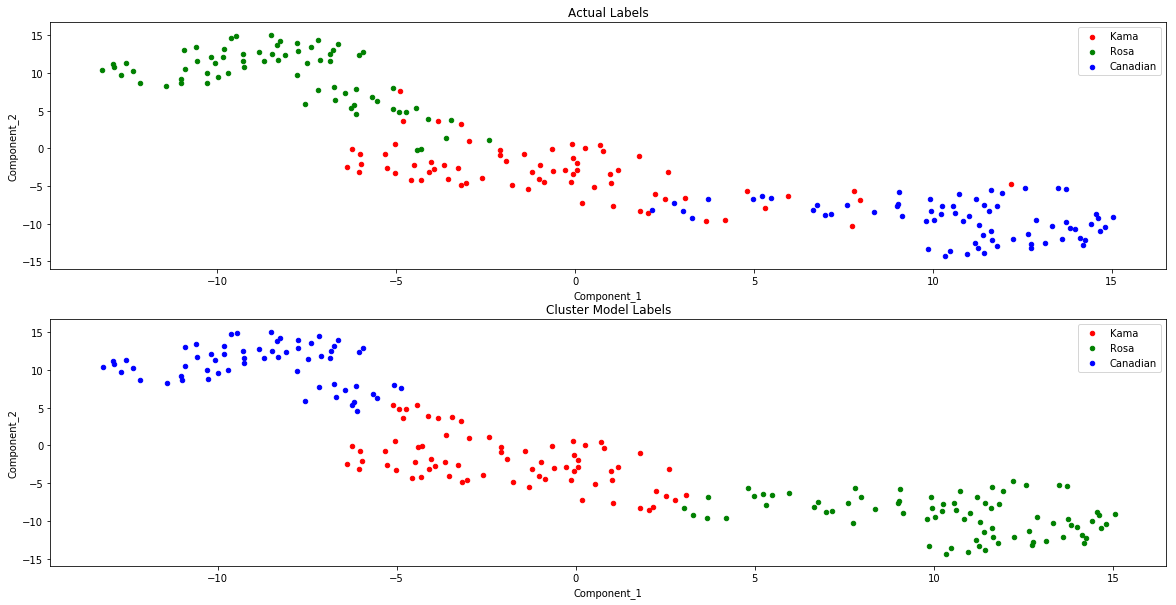

In [24]:
###### Visualization: Scatter Plots by Class and Cluster

fig, ax = plt.subplots(2,1,figsize=(20,10))

scatter_plot_by_class(ax[0], features_2d, target)
scatter_plot_by_class(ax[1], features_2d, cluster_labels)
    
ax[0].set_title('Actual Labels')
ax[1].set_title('Cluster Model Labels')

plt.show()

##### Discussion: Scatter Plots by Class and Cluster

A visual inspection of the labels generated by the cluster model as compared to the original labels shows that the cluster model performs very strongly. The cluster model makes some error particularly at separation boundaries, but in general is able to identify the proper clustering of points. 

It is of note that the cluster labels themselves are simply numerical references to the stored centroids. In other words, a label of `0` signifies that the point should be associated with the first stored mean. The cluster labels should not be taken to mean an association with a particular species of wheat. The cluster model is an unsupervised model and has no notion of the actual labels. Recall that during the fitting process

```
cluster_model.fit(features)
```

the model was not passed the labels at all.

It is also of note that while `features_2d` is used for plotting the labels returned by the cluster model, the model itself was fit using all seven features. 

#### Plotting the Decision Boundary

During the **Modeling for Inference** phase you noted that the two strongest predictive features when used individually were `area` and `width_of_kernel`. Ypu use this knowledge to prepare the final visualization of this Case Study, a two-dimension scatter plot with a decision boundary. This plot takes a predictive model and uses the model to prepare a colored areas representing partitions of the feature space that should be considered indicative of a given class. 

##### Import `scatter_plot_with_decision_boundary`

As before you import `scatter_plot_with_decision_boundary` from the local Python file `visualization.py`.

In [25]:
###### Import `scatter_plot_with_decision_boundary`

from visualization import scatter_plot_with_decision_boundary

##### Import the `KNeighborsClassifier` Class and instantiate a `KNeighborsClassifier` Model

You will be preparing two decision boundary plots, one for a Logistic Regression model and the other for a K-Nearest Neighbors model. It is necessary to import `KNeighborsClassifier` from the `sklearn.neighbors` module.

In [26]:
###### Import the `KNeighborsClassifier` Class and instantiate a `KNeighborsClassifier` Model

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=4)

##### Visualization: Scatter Plots with Decision Boundary

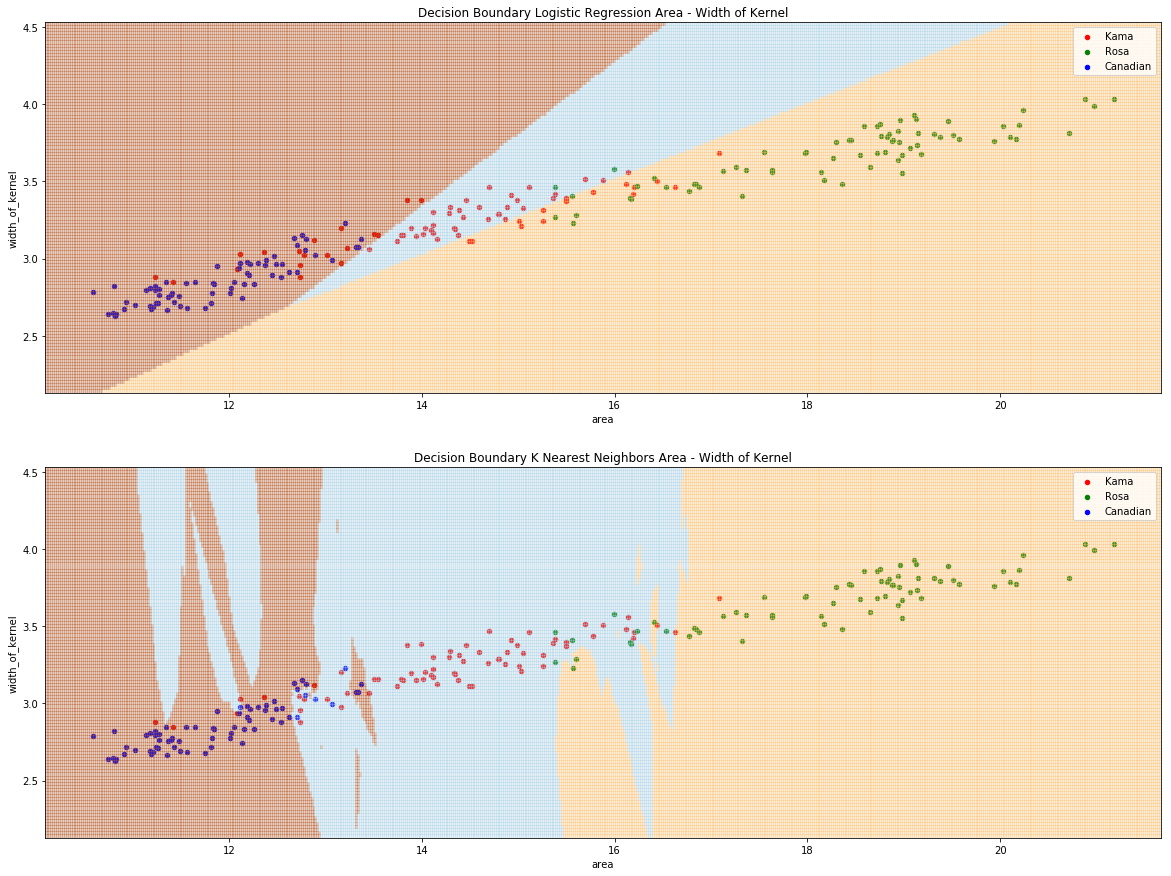

In [27]:
###### Visualization: Scatter Plots with Decision Boundary

fig, ax = plt.subplots(2,1,figsize=(20,15))

scatter_plot_with_decision_boundary(ax[0], features, target, 'area', 'width_of_kernel', lr_model)
scatter_plot_with_decision_boundary(ax[1], features, target, 'area', 'width_of_kernel', knn_model)

ax[0].set_title("Decision Boundary Logistic Regression Area - Width of Kernel")
ax[1].set_title("Decision Boundary K Nearest Neighbors Area - Width of Kernel");

##### Discussion: Scatter Plots with Decision Boundary

The scatter plots with decision boundary show that both models, each using only `area` and `width_of_kernel` to a reasonably good job of capturing the class relationship in the data. You noted some linear separation in the data class relationships and indeed the model is able to encode this reasonably well. It is of note that this linear separation breaks down in a few notable locations. Either of these linear separations, for example, would have returned fewer errors:

<include type="image" url="decision-boundary.png">

###### Scatter plot with decision boundary
    
![](../../img/decision-boundary.png) 

</include>